In [13]:
import pandas as pd
import matplotlib.pyplot as plt
epa = pd.read_csv('../datasets/epa_violations.csv')

/Users/alexlue/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols = [col for col in epa.columns]
penalty_amt = 'Penalty Amount Adjusted For Eliminating Multiple Counting'

# create a new row with penalty amount as int
penalty_int = [int(entry.replace('$', '').replace(',','')) for entry in epa[penalty_amt]]
epa['penalty_amt'] = penalty_int

In [4]:
cols_of_interest = ['penalty_amt', 'Company', 'Parent Company', 'Parent Company Stock Ticker', 'Penalty Year', 'Penalty Date']

In [5]:
# create a new dataframe only with the above columns
epa_cols_interest = epa[cols_of_interest].copy()

In [6]:
# drop NaN rows and reindex our table
epa_cols_interest = epa_cols_interest.dropna()
epa_cols_interest = epa_cols_interest.reset_index()

In [7]:
# sort by highest fine
epa_cols_interest.sort_values(by=['Parent Company Stock Ticker'], ascending=False)

,index,penalty_amt,Company,Parent Company,Parent Company Stock Ticker,Penalty Year,Penalty Date
7453,32342,5000,"ALPHARMA, INC.",Zoetis,ZTS,2000,20000929
2648,10044,29737,Alpharma Inc. (Chicago Heights),Zoetis,ZTS,2006,20061220
7963,34875,30000,Biomet Fair Lawn LP,Zimmer Biomet,ZBH,2006,20060922
492,1914,5766,"ZAYO GROUP, LLC",Zayo Group,ZAYO,2017,20170831
8245,36566,6374,TACO BELL,Yum Brands,YUM,2011,20110201
7213,31126,36562,"YRC, Inc. (Overland Park, KS)",YRC Worldwide,YRCW,2012,20120413
4035,16950,20800,ROADWAY EXPRESS,YRC Worldwide,YRCW,2008,20080627
6301,26995,22770,"YRC FREIGHT, INC.",YRC Worldwide,YRCW,2015,20150914
2165,7629,7900,"NEW PENN MOTOR EXPRESS, INC. SCRANTON TERMINAL",YRC Worldwide,YRCW,2016,20161115
7001,30151,7000,"Yellow Transportation, Inc.",YRC Worldwide,YRCW,2002,20020807


In [8]:
# get unique stock tickers and group fines by company
unique_tickers = epa_cols_interest['Parent Company Stock Ticker'].unique()
unique_years = epa_cols_interest['Penalty Year'].unique()

#
fine_by_year = []
for year in unique_years:
    epa_years = epa_cols_interest[epa_cols_interest['Penalty Year'] == year]
    fine_by_year += [(sum(epa_years['penalty_amt']), year)]

In [9]:
# set x and y axis before plotting

sorted_fines = sorted(fine_by_year, key = lambda x: x[1])
x_axis = [year for _,year in sorted_fines]
y_axis = [fine for fine,_ in sorted_fines]

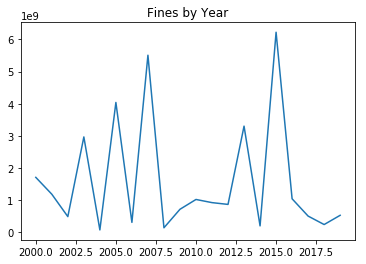

In [14]:
# plot the data

plt.plot(x_axis, y_axis)
plt.title('Fines by Year')
plt.show()

<h1> not really running this </h1>

In [94]:
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [95]:
sd = epa_cols_interest['penalty_amt'].std()
avg = epa_cols_interest['penalty_amt'].mean()

In [97]:
#normalize values
z_score = lambda x: ((x - avg) / float(sd))

# epa_cols_interest['normalized_amt'] = [z_score(val) for val in epa_cols_interest['penalty_amt']]

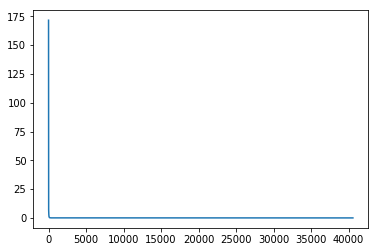

In [98]:
# test_set = sorted(epa['normalized_amt'])[::-1]
# test_set

# plt.plot(test_set)
# plt.show()